# Tensorboard

In [1]:
import tensorboard

In [3]:
%tensorboard --Model logs/fit

UsageError: Line magic function `%tensorboard` not found.


# Analysis

In [1]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt

In [2]:
models = {}
#rm_lis = ['cycle-1.2','TransformerEncoder-absoluta', 'TransformerEncoder-base', 'TransformerEncoder-relative', 'TransformerEncoder-t5', 'sequence-1',]

for runs in os.listdir(".\\T2G2P_1_4_(128, 512)"):
    if runs == "other": continue
    #models[runs] 
    df = pd.read_csv(f".\\T2G2P_1_4_(128, 512)\\{runs}\\validations.txt", sep="|", header=None, names=["Steps + Loss", "DTW", "PCK", "LR"])
    df[['Steps', 'Loss']] = df['Steps + Loss'].str.extract(r'Steps: (\d+) Loss: (\d+\.\d+)')
    df['Steps'] = df['Steps'].astype(int)
    df['Loss'] = df['Loss'].astype(float)
    df.drop(columns=['Steps + Loss'], inplace=True)

    df["DTW"] = df["DTW"].str.extract(r'DTW: (\d+\.\d+)')
    df["DTW"] = df["DTW"].astype(float)

    df["PCK"] = df["PCK"].str.extract(r'PCK: (\d+\.\d+)')
    df["PCK"] = df["PCK"].astype(float)

    df["LR"] = df["LR"].str.extract(r'PCK: (\d+\.\d+)')
    df["LR"] = df["PCK"].astype(float)
    df = df.sort_values(by=['Steps'])
    models[runs] = df[["Steps", "Loss", "DTW", "PCK", "LR"]]


cycle-1.2 <br>
sequence-1<br>
TransformerEncoder-absoluta<br>
TransformerEncoder-base<br>
TransformerEncoder-relative<br>
TransformerEncoder-t5<br>

In [3]:
list(models.keys())

['base-1',
 'base-4',
 'base-8',
 'cycle-1',
 'cycle-4',
 'cycle-8',
 'cycle_rev-1',
 'cycle_rev-4',
 'cycle_rev-8',
 'sequence-1',
 'sequence-4',
 'sequence-8']

In [5]:

for m in models:
    print(m, models.get(m)[len(models.get(m))-1:][["DTW", "PCK"]])

base-1        DTW      PCK
58  15.323  0.51559
base-4         DTW      PCK
145  15.262  0.52196
base-8       DTW      PCK
95  15.48  0.50459
cycle-1        DTW      PCK
83  14.594  0.52428
cycle-4        DTW      PCK
87  15.056  0.49953
cycle-8        DTW      PCK
71  15.562  0.48635
cycle_rev-1         DTW      PCK
120  15.504  0.50366
cycle_rev-4        DTW      PCK
65  14.535  0.53388
cycle_rev-8        DTW     PCK
48  14.965  0.5169
sequence-1        DTW      PCK
60  15.667  0.49982
sequence-4        DTW      PCK
60  15.484  0.49701
sequence-8        DTW      PCK
62  15.104  0.50583


In [43]:
models.get('cycle-1')["Steps"][55:70]

55    56000
56    57000
57    58000
58    59000
59    36000
60    37000
61    38000
62    39000
63    40000
64    41000
65    42000
66    43000
67    44000
68    45000
69    46000
Name: Steps, dtype: int32

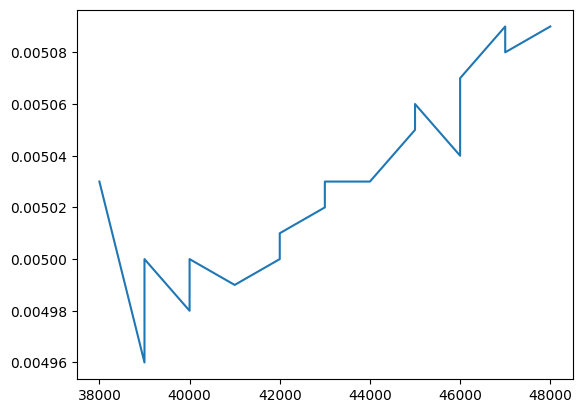

In [45]:
plt.plot(models.get('cycle-1')["Steps"][40:60], models.get('cycle-1')["Loss"][40:60] )

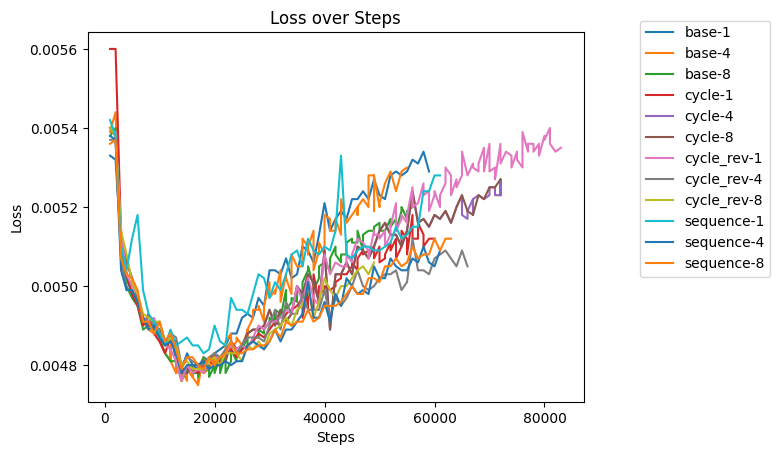

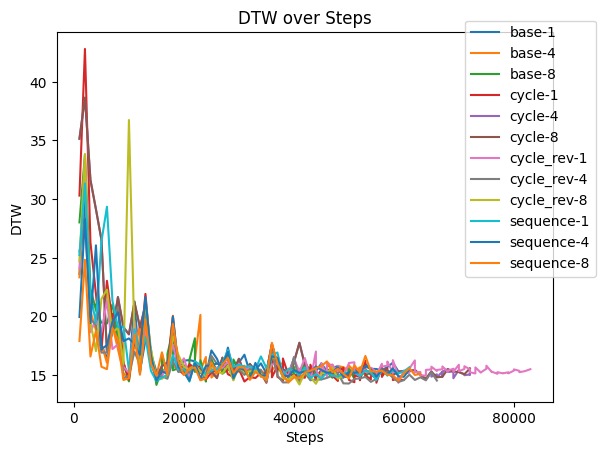

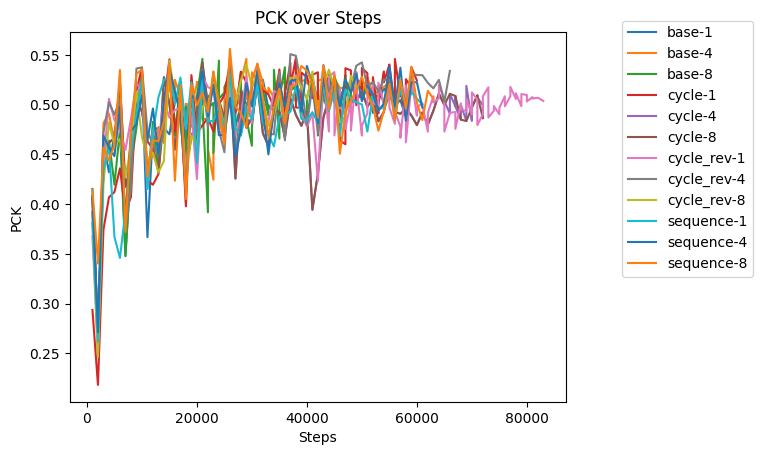

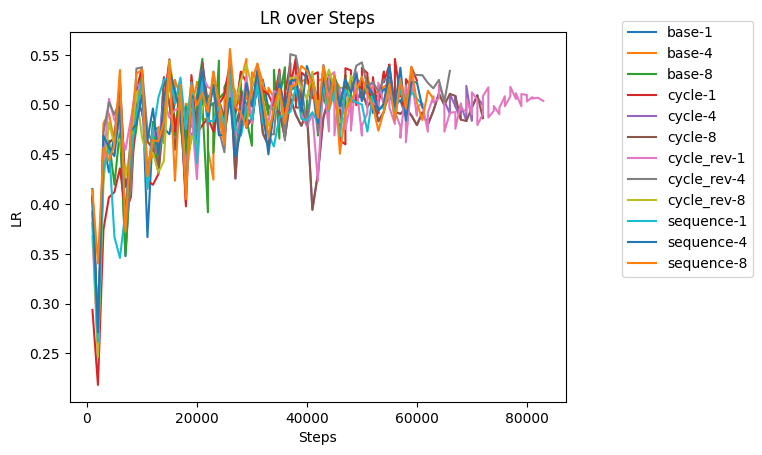

In [6]:
metrics = ["Loss", "DTW", "PCK", "LR"]
for m in metrics:
    for keys in models:
        plt.plot(models.get(keys)["Steps"], models.get(keys)[m], label= keys)
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.xlabel("Steps")
        plt.ylabel(m)
        plt.title(f"{m} over Steps")
    plt.show()
   

In [14]:
concatenated_df = pd.concat(models.values(), ignore_index=True)
average_values = concatenated_df.groupby('Steps').mean()
average_values["Loss"].to_csv("test.csv")

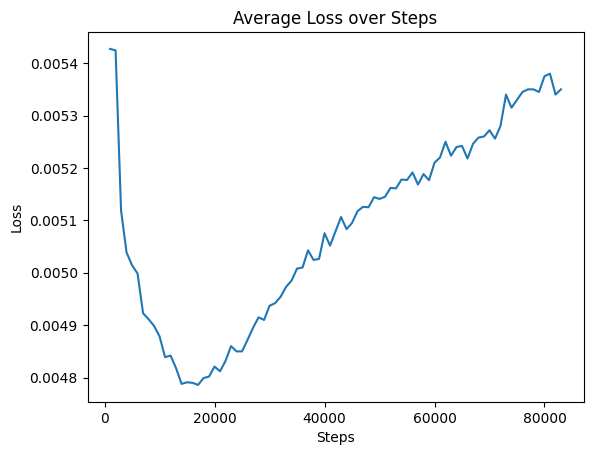

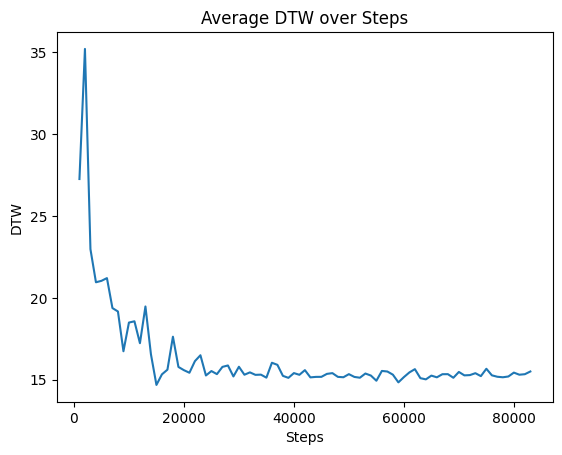

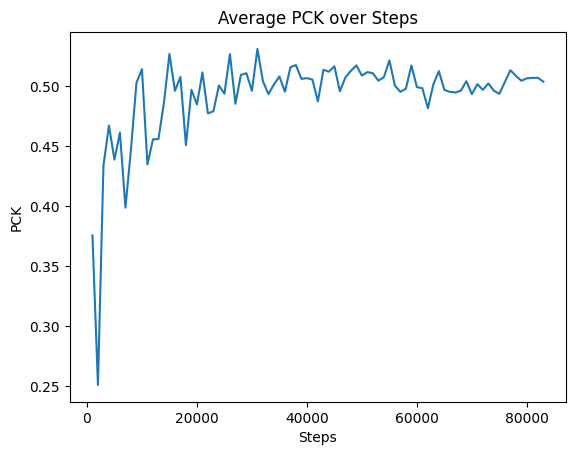

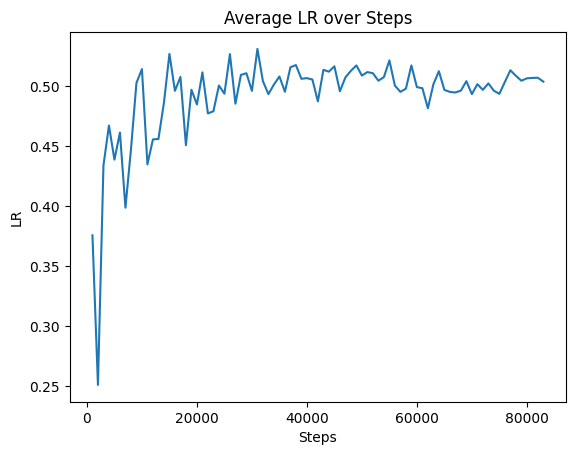

In [47]:
metrics = ["Loss", "DTW", "PCK", "LR"]
for m in metrics:
    plt.plot(average_values.index, average_values[m], label= keys)
    #plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Steps")
    plt.ylabel(m)
    plt.title(f"Average {m} over Steps")
    plt.show()
   

In [15]:
sys.path.append("..")
import plot_videos

In [16]:
with open("..\\Data\\Tmp\\test.skels", "r") as f:
    pose = f.readline()
    f.close()
pose

'-0.010785 -0.365018 -3.7e-05 7.4e-05 -0.12926 0.000213 -0.153015 -0.116019 0.056504 -0.274138 0.163145 0.238555 -0.235485 0.40447 0.238806 0.148882 -0.116089 0.067016 0.260319 0.149148 0.274325 0.18792 0.286611 0.462989 0.178139 0.230667 0.463261 0.166288 0.198267 0.463324 0.140149 0.161791 0.463573 0.118919 0.132276 0.463668 0.10056 0.104462 0.463758 0.089493 0.211316 0.463517 0.088037 0.25594 0.463647 0.088282 0.285314 0.463901 0.077012 0.265654 0.477519 0.105671 0.26436 0.495868 0.10257 0.307623 0.512999 0.099489 0.276252 0.513148 0.094577 0.250308 0.513399 0.131687 0.294987 0.463494 0.121081 0.3051 0.504483 0.12276 0.276781 0.504736 0.122456 0.252896 0.504987 0.153644 0.301973 0.4635 0.144261 0.312435 0.496405 0.144505 0.292278 0.496486 0.144963 0.273263 0.496736 -0.235412 0.347678 0.239078 -0.230776 0.313491 0.239117 -0.219505 0.270055 0.239366 -0.211825 0.234519 0.239617 -0.206921 0.201555 0.239653 -0.19193 0.268042 0.239275 -0.160899 0.296881 0.253377 -0.1551 0.325677 0.253631 

In [17]:
plot_videos.plot_video(pose, "..\\..\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\features\\fullFrame-210x260px\\test\\01April_2010_Thursday_heute-6704","video1")

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None